In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Using TensorFlow backend.


In [2]:
seed=7
np.random.seed(seed)

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
num_pixels = X_train.shape[1]*X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [5]:
X_train = X_train/255
X_test = X_test/255

In [6]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [8]:
def baseline_model():
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal',activation = 'softmax'))
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model

In [9]:
model = baseline_model()
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=200,verbose=2)
scores=model.evaluate(X_test,y_test,verbose=0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
2s - loss: 0.2835 - acc: 0.9192 - val_loss: 0.1395 - val_acc: 0.9583
Epoch 2/10
0s - loss: 0.1095 - acc: 0.9682 - val_loss: 0.0910 - val_acc: 0.9710
Epoch 3/10
0s - loss: 0.0702 - acc: 0.9801 - val_loss: 0.0796 - val_acc: 0.9761
Epoch 4/10
0s - loss: 0.0496 - acc: 0.9861 - val_loss: 0.0725 - val_acc: 0.9772
Epoch 5/10
0s - loss: 0.0371 - acc: 0.9894 - val_loss: 0.0667 - val_acc: 0.9798
Epoch 6/10
0s - loss: 0.0265 - acc: 0.9931 - val_loss: 0.0652 - val_acc: 0.9793
Epoch 7/10
0s - loss: 0.0209 - acc: 0.9946 - val_loss: 0.0585 - val_acc: 0.9815
Epoch 8/10
0s - loss: 0.0134 - acc: 0.9971 - val_loss: 0.0621 - val_acc: 0.9803
Epoch 9/10
0s - loss: 0.0111 - acc: 0.9974 - val_loss: 0.0568 - val_acc: 0.9816
Epoch 10/10
0s - loss: 0.0077 - acc: 0.9988 - val_loss: 0.0575 - val_acc: 0.9817


In [10]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


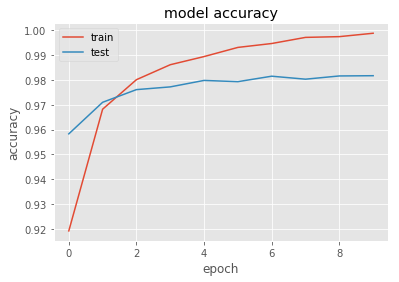

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.savefig('ten-epoch-acc.jpg', DPI=1000)
plt.show()

In [12]:
model2 = baseline_model()
history2 = model2.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50,batch_size=200,verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
0s - loss: 0.2766 - acc: 0.9206 - val_loss: 0.1430 - val_acc: 0.9594
Epoch 2/50
0s - loss: 0.1088 - acc: 0.9684 - val_loss: 0.0930 - val_acc: 0.9721
Epoch 3/50
0s - loss: 0.0702 - acc: 0.9799 - val_loss: 0.0777 - val_acc: 0.9771
Epoch 4/50
0s - loss: 0.0498 - acc: 0.9857 - val_loss: 0.0721 - val_acc: 0.9786
Epoch 5/50
0s - loss: 0.0362 - acc: 0.9898 - val_loss: 0.0666 - val_acc: 0.9794
Epoch 6/50
0s - loss: 0.0256 - acc: 0.9934 - val_loss: 0.0658 - val_acc: 0.9817
Epoch 7/50
0s - loss: 0.0195 - acc: 0.9949 - val_loss: 0.0591 - val_acc: 0.9814
Epoch 8/50
0s - loss: 0.0141 - acc: 0.9968 - val_loss: 0.0571 - val_acc: 0.9827
Epoch 9/50
0s - loss: 0.0112 - acc: 0.9975 - val_loss: 0.0655 - val_acc: 0.9809
Epoch 10/50
0s - loss: 0.0082 - acc: 0.9983 - val_loss: 0.0585 - val_acc: 0.9833
Epoch 11/50
0s - loss: 0.0056 - acc: 0.9992 - val_loss: 0.0582 - val_acc: 0.9830
Epoch 12/50
0s - loss: 0.0051 - acc: 0.9992 - val_loss: 0.0614 - val

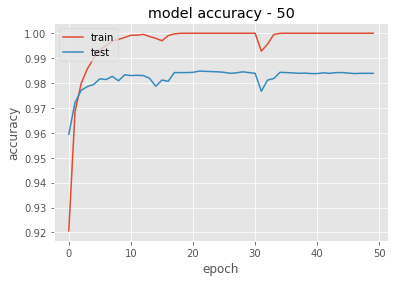

In [15]:
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model accuracy - 50')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.savefig('fifty-epoch-acc.jpg', DPI=1000)
plt.show()

In [16]:
model3 = baseline_model()
history3 = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=200,verbose=2)
scores3=model.evaluate(X_test,y_test,verbose=0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
0s - loss: 0.0057 - acc: 0.9992 - val_loss: 0.0624 - val_acc: 0.9812
Epoch 2/100
0s - loss: 0.0058 - acc: 0.9989 - val_loss: 0.0629 - val_acc: 0.9807
Epoch 3/100
0s - loss: 0.0041 - acc: 0.9994 - val_loss: 0.0601 - val_acc: 0.9827
Epoch 4/100
0s - loss: 0.0027 - acc: 0.9996 - val_loss: 0.0649 - val_acc: 0.9822
Epoch 5/100
0s - loss: 0.0079 - acc: 0.9977 - val_loss: 0.0784 - val_acc: 0.9792
Epoch 6/100
0s - loss: 0.0109 - acc: 0.9965 - val_loss: 0.0726 - val_acc: 0.9793
Epoch 7/100
0s - loss: 0.0038 - acc: 0.9992 - val_loss: 0.0647 - val_acc: 0.9839
Epoch 8/100
0s - loss: 0.0011 - acc: 1.0000 - val_loss: 0.0629 - val_acc: 0.9834
Epoch 9/100
0s - loss: 5.0422e-04 - acc: 1.0000 - val_loss: 0.0630 - val_acc: 0.9835
Epoch 10/100
0s - loss: 3.8141e-04 - acc: 1.0000 - val_loss: 0.0634 - val_acc: 0.9834
Epoch 11/100
0s - loss: 3.0991e-04 - acc: 1.0000 - val_loss: 0.0645 - val_acc: 0.9834
Epoch 12/100
0s - loss: 2.7240e-04 - acc: 1.0

0s - loss: 3.5176e-07 - acc: 1.0000 - val_loss: 0.1017 - val_acc: 0.9846
Epoch 98/100
0s - loss: 3.2212e-07 - acc: 1.0000 - val_loss: 0.1018 - val_acc: 0.9849
Epoch 99/100
0s - loss: 2.9047e-07 - acc: 1.0000 - val_loss: 0.1028 - val_acc: 0.9845
Epoch 100/100
0s - loss: 2.6528e-07 - acc: 1.0000 - val_loss: 0.1037 - val_acc: 0.9845


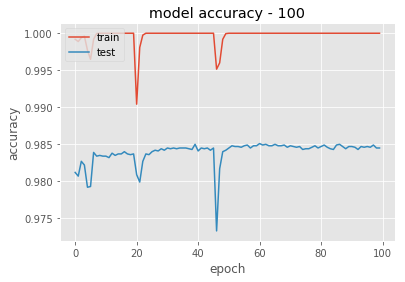

In [18]:
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.title('model accuracy - 100')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.savefig('100-epoch-acc.jpg', DPI=1000)
plt.show()